In [ ]:
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install librosa


In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Projects/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
data[45000:45100]


array([-0.00642211, -0.00633277, -0.00618267, -0.00646402, -0.0068297 ,
       -0.00716039, -0.00684222, -0.00648624, -0.00623939, -0.00617652,
       -0.00610478, -0.00618818, -0.00596934, -0.00522639, -0.00477147,
       -0.00426249, -0.00390363, -0.00342612, -0.00338029, -0.00314128,
       -0.00326458, -0.00349545, -0.00319855, -0.00303377, -0.00316995,
       -0.00256448, -0.00232591, -0.00220381, -0.00032955,  0.00212929,
        0.00458807,  0.00707587,  0.00927432,  0.00985005,  0.01047457,
        0.01150271,  0.01328735,  0.01503059,  0.01567831,  0.01560969,
        0.01419976,  0.01226828,  0.01090507,  0.01106076,  0.01084399,
        0.01023139,  0.00936303,  0.0081989 ,  0.0072638 ,  0.00686666,
        0.00738504,  0.00734165,  0.00646042,  0.00466002,  0.00309387,
        0.00194398,  0.00125776,  0.00113422,  0.00043837, -0.0010443 ,
       -0.00361812, -0.00584547, -0.00739926, -0.00806093, -0.00791311,
       -0.0078322 , -0.00771973, -0.00785792, -0.00778844, -0.00

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


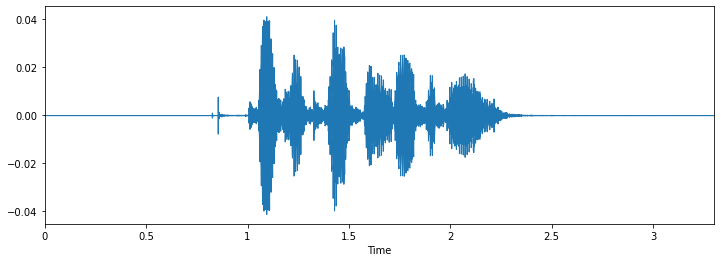

In [ ]:
% pylab inline

import os
import pandas as pd
import glob


plt.figure(figsize = (12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
import time

path = '/content/gdrive/MyDrive/Projects/RAVDESS'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 115.61154389381409 seconds ---


In [ ]:
file

7

In [ ]:
len(lst)

1440

In [ ]:
X, y = zip(*lst)
y

(0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 4,
 3,
 7,
 6,
 4,
 6,
 7,
 6,
 6,
 5,
 7,
 5,
 6,
 6,
 7,
 4,
 4,
 4,
 7,
 7,
 5,
 5,
 5,
 7,
 5,
 5,
 4,
 6,
 5,
 4,
 4,
 6,
 7,
 0,
 5,
 2,
 3,
 3,
 0,
 0,
 5,
 3,
 5,
 1,
 5,
 5,
 4,
 1,
 3,
 1,
 2,
 0,
 2,
 2,
 2,
 3,
 4,
 1,
 4,
 5,
 3,
 5,
 3,
 2,
 4,
 1,
 1,
 3,
 2,
 4,
 4,
 4,
 4,
 1,
 2,
 1,
 6,
 6,
 5,
 7,
 7,
 6,
 7,
 7,
 6,
 7,
 6,
 6,
 7,
 6,
 6,
 7,
 7,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 4,
 4,
 2,
 4,
 3,
 1,
 5,
 5,
 4,
 4,
 3,
 5,
 4,
 4,
 2,
 5,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 5,
 6,
 6,
 5,
 5,
 5,
 7,
 7,
 7,
 6,
 6,
 7,
 7,
 7,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 0,
 0,
 1,
 3,
 3,
 2,
 4,
 3,
 5,
 5,
 4,
 2,
 4,
 3,
 1,
 2,
 1,
 6,
 5,
 0,
 3,
 4,
 4,
 3,
 0,
 5,
 5,
 5,
 5,
 2,
 6,
 3,
 5,
 4,
 2,
 1,
 1,
 4,
 3,
 4,
 2,
 1,
 1,
 2,
 1,
 2,
 6,
 6,
 6,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 1,
 1,
 3,
 3,
 4,
 4,
 0,
 2,
 1,
 3,


In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((1440, 40), (1440,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.30      0.35      0.33        20
           1       0.54      0.45      0.49        42
           2       0.39      0.35      0.37        40
           3       0.28      0.32      0.30        34
           4       0.43      0.37      0.40        35
           5       0.28      0.38      0.33        39
           6       0.36      0.36      0.36        39
           7       0.48      0.41      0.44        39

    accuracy                           0.38       288
   macro avg       0.38      0.38      0.38       288
weighted avg       0.39      0.38      0.38       288



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
clf = make_pipeline(StandardScaler(), SVC())

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
predictions_clf = clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_clf))

              precision    recall  f1-score   support

           0       0.12      0.05      0.07        20
           1       0.46      0.57      0.51        42
           2       0.57      0.40      0.47        40
           3       0.38      0.44      0.41        34
           4       0.79      0.66      0.72        35
           5       0.55      0.67      0.60        39
           6       0.51      0.59      0.55        39
           7       0.56      0.56      0.56        39

    accuracy                           0.52       288
   macro avg       0.49      0.49      0.49       288
weighted avg       0.52      0.52      0.51       288



In [ ]:
clf = make_pipeline(StandardScaler(), SVC(kernel = "rbf", gamma = 0.012, C=87))

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=87, gamma=0.012))])

In [ ]:
predictions_clf = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_clf))

              precision    recall  f1-score   support

           0       0.45      0.75      0.57        20
           1       0.77      0.55      0.64        42
           2       0.70      0.75      0.72        40
           3       0.58      0.65      0.61        34
           4       0.88      0.86      0.87        35
           5       0.67      0.74      0.71        39
           6       0.83      0.74      0.78        39
           7       0.75      0.62      0.68        39

    accuracy                           0.70       288
   macro avg       0.70      0.71      0.70       288
weighted avg       0.72      0.70      0.70       288



In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
#Hyperparameter tuning
random_grid = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

svc_grid = RandomizedSearchCV(SVC(), random_grid, cv = 10, n_jobs = -1, verbose=True)

svc_grid.fit(X,y)

print(svc_grid.best_score_)
print(svc_grid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.26180555555555557
{'C': 87.16833734379968, 'class_weight': None, 'gamma': 0.012927724177895714, 'kernel': 'rbf'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest = RandomForestClassifier()

In [ ]:
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = rforest.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.62      0.74      0.67        42
           2       0.61      0.47      0.54        40
           3       0.50      0.44      0.47        34
           4       0.61      0.66      0.63        35
           5       0.57      0.59      0.58        39
           6       0.56      0.62      0.59        39
           7       0.69      0.64      0.67        39

    accuracy                           0.59       288
   macro avg       0.59      0.59      0.59       288
weighted avg       0.59      0.59      0.59       288



In [ ]:
#Hyperparameter tuning
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, cv = 10, n_jobs = -1, verbose=True)

rf_grid.fit(X,y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.4305555555555555
{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}


In [ ]:
rforest = RandomForestClassifier(n_estimators= 2000, min_samples_split=2, min_samples_leaf= 1, max_features= 'auto', max_depth= 90, bootstrap= True)

In [ ]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, n_estimators=2000)

In [ ]:
predictions = rforest.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.56      0.69      0.62        42
           2       0.74      0.42      0.54        40
           3       0.48      0.47      0.48        34
           4       0.69      0.71      0.70        35
           5       0.58      0.67      0.62        39
           6       0.54      0.54      0.54        39
           7       0.73      0.77      0.75        39

    accuracy                           0.60       288
   macro avg       0.61      0.60      0.59       288
weighted avg       0.61      0.60      0.60       288



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

mlp = MLPClassifier(max_iter=1000, learning_rate="constant", batch_size=256).fit(X_train, y_train)
predictions_mlp = mlp.predict(X_test)
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.31      0.25      0.28        20
           1       0.46      0.38      0.42        42
           2       0.65      0.38      0.48        40
           3       0.33      0.50      0.40        34
           4       0.59      0.66      0.62        35
           5       0.74      0.44      0.55        39
           6       0.38      0.74      0.50        39
           7       0.52      0.33      0.41        39

    accuracy                           0.47       288
   macro avg       0.50      0.46      0.46       288
weighted avg       0.51      0.47      0.47       288



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

gbc = GradientBoostingClassifier().fit(X_train, y_train)
predictions_gbc = gbc.predict(X_test)
print(classification_report(y_test,predictions_gbc))

              precision    recall  f1-score   support

           0       0.41      0.35      0.38        20
           1       0.53      0.48      0.50        42
           2       0.49      0.47      0.48        40
           3       0.39      0.47      0.43        34
           4       0.66      0.60      0.63        35
           5       0.43      0.51      0.47        39
           6       0.59      0.49      0.54        39
           7       0.55      0.59      0.57        39

    accuracy                           0.50       288
   macro avg       0.50      0.50      0.50       288
weighted avg       0.51      0.50      0.50       288



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.32      0.35      0.33        20
           1       0.50      0.45      0.48        42
           2       0.53      0.50      0.51        40
           3       0.47      0.53      0.50        34
           4       0.56      0.54      0.55        35
           5       0.47      0.59      0.52        39
           6       0.53      0.46      0.49        39
           7       0.57      0.51      0.54        39

    accuracy                           0.50       288
   macro avg       0.49      0.49      0.49       288
weighted avg       0.50      0.50      0.50       288



In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((1152, 40, 1), (288, 40, 1))

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_9 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout_23 (Dropout)        (None, 40, 128)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_10 (Activation)  (None, 5, 128)            0         
                                                     

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=300, validation_data=(x_testcnn, y_test))

ValueError: ignored

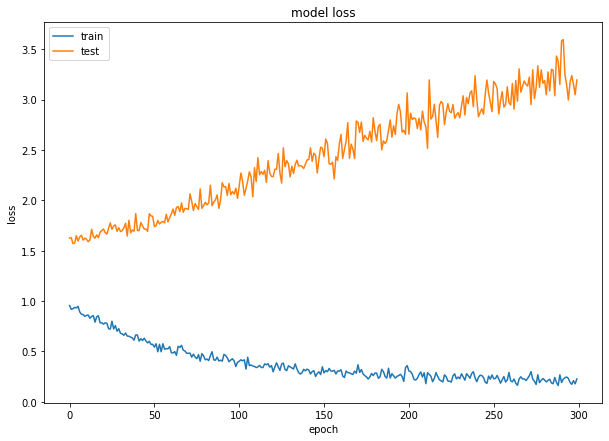

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



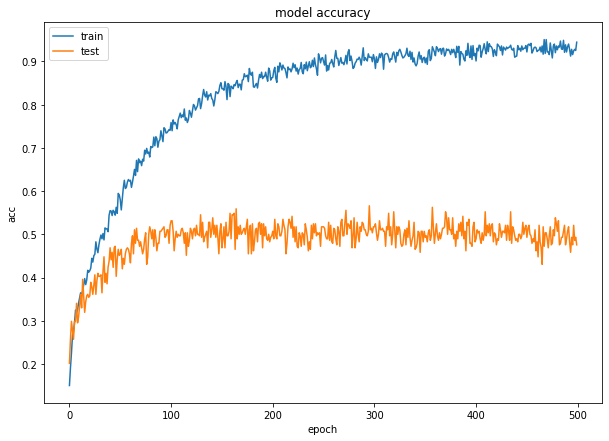

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#56.6


In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(GRU(90, return_sequences=True,dropout=0.2, input_shape=(40, 1)))
model.add(GRU(60,dropout=0.2, return_sequences=True))
model.add(Flatten())
model.add(Dense(60))
model.add(Dropout(0.2))
model.add(Dense(30))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

In [ ]:
from keras.callbacks import EarlyStopping
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1)

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
72/72 [==============================] - 6s 42ms/step - loss: 2.0590 - accuracy: 0.2161 - val_loss: 1.9554 - val_accuracy: 0.2257
Epoch 2/100
72/72 [==============================] - 2s 27ms/step - loss: 1.9178 - accuracy: 0.2656 - val_loss: 1.9115 - val_accuracy: 0.3056
Epoch 3/100
72/72 [==============================] - 2s 27ms/step - loss: 1.8734 - accuracy: 0.2648 - val_loss: 1.8704 - val_accuracy: 0.2361
Epoch 4/100
72/72 [==============================] - 2s 27ms/step - loss: 1.8378 - accuracy: 0.3021 - val_loss: 1.8660 - val_accuracy: 0.3160
Epoch 5/100
72/72 [==============================] - 2s 26ms/step - loss: 1.8043 - accuracy: 0.3160 - val_loss: 1.8642 - val_accuracy: 0.2917
Epoch 6/100
72/72 [==============================] - 2s 27ms/step - loss: 1.7638 - accuracy: 0.3255 - val_loss: 1.8483 - val_accuracy: 0.3056
Epoch 7/100
72/72 [==============================] - 2s 27ms/step - loss: 1.7520 - accuracy: 0.3490 - val_loss: 1.7386 - val_accuracy: 0.3889
Epoch 

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 40, 90)            25110     
                                                                 
 gru_9 (GRU)                 (None, 40, 60)            27360     
                                                                 
 flatten_6 (Flatten)         (None, 2400)              0         
                                                                 
 dense_16 (Dense)            (None, 60)                144060    
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_17 (Dense)            (None, 30)                1830      
                                                                 
 dropout_13 (Dropout)        (None, 30)               

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

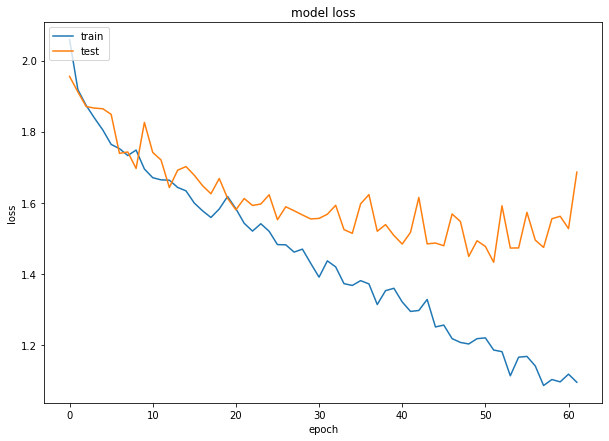

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



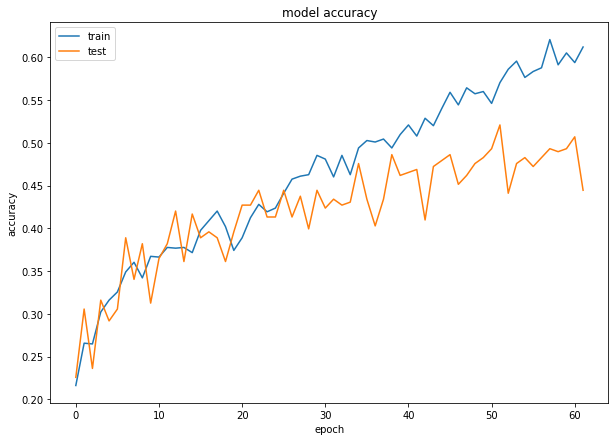

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(90, return_sequences=True,dropout=0.2, input_shape=(40, 1)))
model.add(LSTM(60,dropout=0.2, return_sequences=True))
model.add(Flatten())
model.add(Dense(60))
model.add(Dropout(0.2))
model.add(Dense(30))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
72/72 [==============================] - 6s 42ms/step - loss: 2.0065 - accuracy: 0.2135 - val_loss: 1.9491 - val_accuracy: 0.2535
Epoch 2/200
72/72 [==============================] - 2s 26ms/step - loss: 1.8734 - accuracy: 0.2717 - val_loss: 1.8970 - val_accuracy: 0.2847
Epoch 3/200
72/72 [==============================] - 2s 26ms/step - loss: 1.8896 - accuracy: 0.2708 - val_loss: 1.8997 - val_accuracy: 0.2535
Epoch 4/200
72/72 [==============================] - 2s 26ms/step - loss: 1.8508 - accuracy: 0.2882 - val_loss: 1.8046 - val_accuracy: 0.2917
Epoch 5/200
72/72 [==============================] - 2s 26ms/step - loss: 1.7978 - accuracy: 0.3056 - val_loss: 1.8368 - val_accuracy: 0.2951
Epoch 6/200
72/72 [==============================] - 2s 27ms/step - loss: 1.7837 - accuracy: 0.3151 - val_loss: 1.7976 - val_accuracy: 0.3160
Epoch 7/200
72/72 [==============================] - 2s 27ms/step - loss: 1.7700 - accuracy: 0.3220 - val_loss: 1.7673 - val_accuracy: 0.3229
Epoch 

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 40, 90)            33120     
                                                                 
 lstm_3 (LSTM)               (None, 40, 60)            36240     
                                                                 
 flatten_8 (Flatten)         (None, 2400)              0         
                                                                 
 dense_20 (Dense)            (None, 60)                144060    
                                                                 
 dropout_16 (Dropout)        (None, 60)                0         
                                                                 
 dense_21 (Dense)            (None, 30)                1830      
                                                                 
 dropout_17 (Dropout)        (None, 30)               

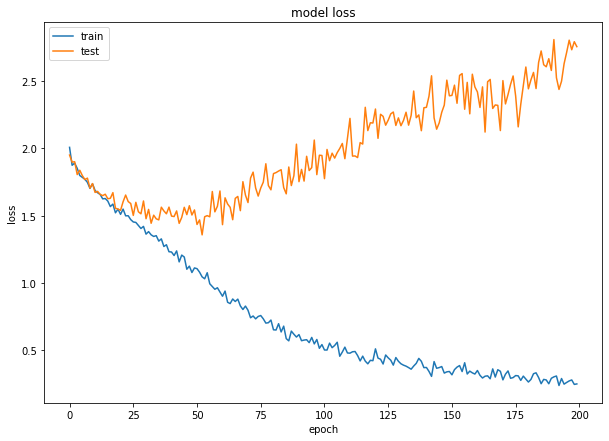

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

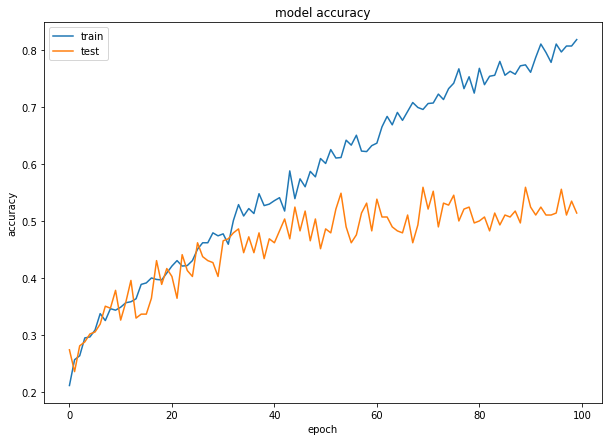

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(X)

In [ ]:
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([0, 1, 1, ..., 6, 7, 7])

In [ ]:
y = to_categorical(y)
print(y.shape)
print(y)

(1440, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=True)

In [ ]:
x = np.expand_dims(x,axis=2)
x.shape

(1440, 40, 1)

In [ ]:
model = Sequential()
model.add(Dense(256,input_shape=(40,1)))
model.add(Dense(512, activation= "relu"))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Dense(256, activation="tanh"))
model.add(Dropout(0.20))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.10))
model.add(Dense(64))
model.add(Dense(40))
model.add(Flatten())
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40, 256)           512       
                                                                 
 dense_24 (Dense)            (None, 40, 512)           131584    
                                                                 
 dropout_18 (Dropout)        (None, 40, 512)           0         
                                                                 
 dense_25 (Dense)            (None, 40, 512)           262656    
                                                                 
 dense_26 (Dense)            (None, 40, 256)           131328    
                                                                 
 dropout_19 (Dropout)        (None, 40, 256)           0         
                                                                 
 dense_27 (Dense)            (None, 40, 256)          

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_cnn = model.fit(x_train,y_train,batch_size = 32,epochs=250,validation_data=(x_test,y_test))

Epoch 1/250
41/41 [==============================] - 3s 30ms/step - loss: 2.0543 - accuracy: 0.1535 - val_loss: 1.8902 - val_accuracy: 0.2847
Epoch 2/250
41/41 [==============================] - 1s 20ms/step - loss: 1.7772 - accuracy: 0.3395 - val_loss: 1.6448 - val_accuracy: 0.3889
Epoch 3/250
41/41 [==============================] - 1s 20ms/step - loss: 1.6010 - accuracy: 0.3912 - val_loss: 1.6225 - val_accuracy: 0.3611
Epoch 4/250
41/41 [==============================] - 1s 20ms/step - loss: 1.4906 - accuracy: 0.4406 - val_loss: 1.4713 - val_accuracy: 0.4306
Epoch 5/250
41/41 [==============================] - 1s 20ms/step - loss: 1.4047 - accuracy: 0.4730 - val_loss: 1.5404 - val_accuracy: 0.4167
Epoch 6/250
41/41 [==============================] - 1s 19ms/step - loss: 1.3687 - accuracy: 0.4869 - val_loss: 1.4789 - val_accuracy: 0.4167
Epoch 7/250
41/41 [==============================] - 1s 18ms/step - loss: 1.3201 - accuracy: 0.4992 - val_loss: 1.5145 - val_accuracy: 0.4306
Epoch 

In [ ]:
model.save('Speech-Emotion-Recognition_BEST_Model_shape_40_MFCC.h5')

No handles with labels found to put in legend.


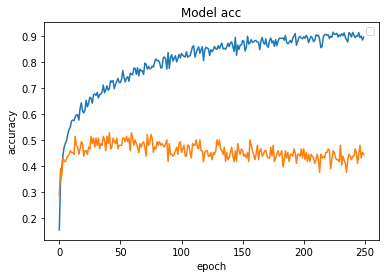

In [ ]:
plt.plot(model_cnn.history['accuracy'])
plt.plot(model_cnn.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()